In [2]:
import re                                                                              ### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [6]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

#importing the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_train = pd.read_excel('Data_Train.xlsx')                                                 ## import dataset
df_test = pd.read_excel('Data_Test.xlsx')

In [10]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [12]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [14]:
df_train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

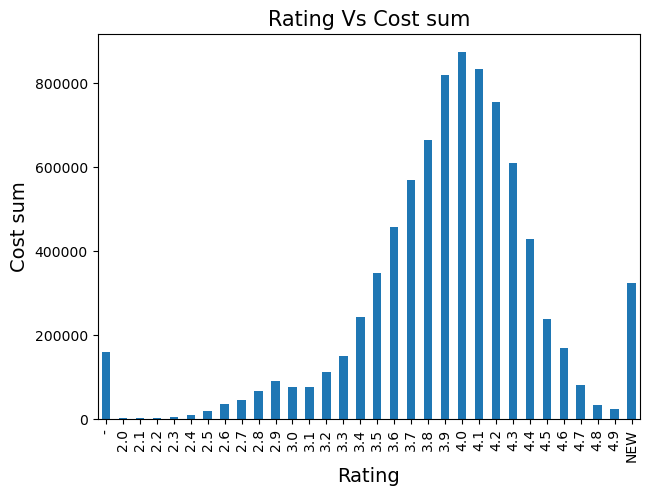

In [15]:
plt.figure(figsize = (7, 5))                                                     ## data exploration
df_train.groupby('RATING')['COST'].sum().plot(kind = 'bar')
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Cost sum', fontsize = 14)
plt.title('Rating Vs Cost sum', fontsize = 15);

In [16]:
df_train['CITY'].value_counts()

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: CITY, Length: 359, dtype: int64

<Axes: >

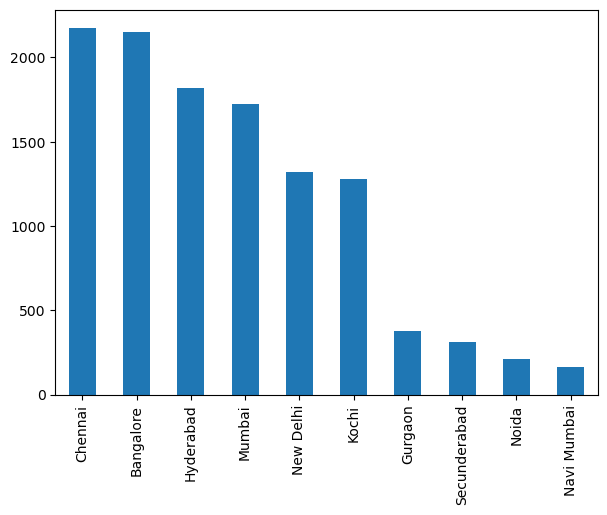

In [17]:
plt.figure(figsize = (7, 5))
Cities = df_train['CITY'].value_counts()[:10]
Cities.plot.bar()

In [18]:
df_train[df_train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [19]:
df_train[df_train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [20]:
df_train[df_train['CITY'] == 'Hyderabad']['COST'].mean()

595.1786695986806

In [21]:
df_train['RATING'] = df_train['RATING'].astype('object')
df_test['RATING'] = df_test['RATING'].astype('object')

In [22]:
df_train['RATING'] = df_train['RATING'].astype('object')
df_test['RATING'] = df_test['RATING'].astype('object')

In [23]:
df_train['RATING'].replace({'-' : 0.0, 'NEW' : 5.0}, inplace = True)
df_test['RATING'].replace({'-': 0.0 , 'NEW' : 5.0}, inplace = True)
df_train['RATING'] = df_train['RATING'].astype(float)
df_test['RATING'] = df_test['RATING'].astype(float)

In [24]:
df_train.describe()

,RESTAURANT_ID,RATING,COST
count,12690.000000,12688.000000,12690.000000
mean,7759.134121,3.705446,655.252246
std,4504.874150,0.892285,627.003540
min,0.000000,0.000000,20.000000
25%,3863.250000,3.500000,300.000000
50%,7740.000000,3.800000,500.000000
75%,11688.750000,4.100000,800.000000
max,15573.000000,5.000000,14000.000000


In [25]:
df_test.describe()

,RESTAURANT_ID,RATING
count,4231.000000,4229.000000
mean,7791.438431,3.687515
std,4458.797621,0.915524
min,3.000000,0.000000
25%,3908.500000,3.500000
50%,7798.000000,3.800000
75%,11634.000000,4.100000
max,15572.000000,5.000000


In [26]:
df_train['Source'] = 'Train'                                                ## joining data
df_test['Source'] = 'Test'

In [27]:
df = pd.concat([df_train, df_test], ignore_index = True)
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Train


In [28]:
## Making 'VOTES' feature clean
df['VOTES'] = df['VOTES'].str.rstrip('votes')
df['VOTES'] = df['VOTES'].astype(float)

In [29]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
Source              0
dtype: int64

In [30]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Train


In [31]:
df['VOTES'].fillna(df['VOTES'].median(), inplace = True)
df['RATING'].fillna(df['RATING'].median(), inplace = True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace = True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)

In [32]:
df.isna().sum()


TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
Source              0
dtype: int64

In [33]:
df['Title_rat'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].mean())                               ##feature engineering
df['Title_rat_count'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].count())
df['Title_rat_sum'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].sum())

df['City_rat'] = df['CITY'].map(df.groupby('CITY')['RATING'].mean())
df['City_rat_count'] = df['CITY'].map(df.groupby('CITY')['RATING'].count())
df['City_rat_sum'] = df['CITY'].map(df.groupby('CITY')['RATING'].sum())

df['Cuisines_rat'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].mean())
df['Cuisines_rat_count'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].count())
df['Cuisines_rat_sum'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].sum())

df['Rat_Vot'] = df['RATING'] * df['VOTES']

In [34]:
df.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source,Title_rat,Title_rat_count,Title_rat_sum,City_rat,City_rat_count,City_rat_sum,Cuisines_rat,Cuisines_rat_count,Cuisines_rat_sum,Rat_Vot
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Train,3.651487,4910,17928.8,4.155932,118,490.4,3.6,1,3.6,176.4
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Train,4.098920,463,1897.8,3.655796,3002,10974.7,4.2,1,4.2,126.0


In [35]:
le = LabelEncoder()
for cols in df.columns:
    if not pd.api.types.is_numeric_dtype(cols):
        df[cols] = le.fit_transform(df[cols])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TITLE               16921 non-null  int32
 1   RESTAURANT_ID       16921 non-null  int64
 2   CUISINES            16921 non-null  int32
 3   TIME                16921 non-null  int32
 4   CITY                16921 non-null  int32
 5   LOCALITY            16921 non-null  int32
 6   RATING              16921 non-null  int64
 7   VOTES               16921 non-null  int64
 8   COST                16921 non-null  int64
 9   Source              16921 non-null  int32
 10  Title_rat           16921 non-null  int64
 11  Title_rat_count     16921 non-null  int64
 12  Title_rat_sum       16921 non-null  int64
 13  City_rat            16921 non-null  int64
 14  City_rat_count      16921 non-null  int64
 15  City_rat_sum        16921 non-null  int64
 16  Cuisines_rat        16921 non-null  int6

In [37]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source,Title_rat,Title_rat_count,Title_rat_sum,City_rat,City_rat_count,City_rat_sum,Cuisines_rat,Cuisines_rat_count,Cuisines_rat_sum,Rat_Vot
0,34,9438,3294,898,400,328,17,46,36,1,31,52,102,77,22,90,150,0,15,538
1,36,13198,364,2301,75,1214,23,27,43,1,71,48,99,40,33,100,356,0,21,366
2,34,10915,3729,806,75,1272,19,218,28,1,31,52,102,40,33,100,164,3,141,2280
3,104,6346,5156,340,277,161,22,21,28,1,25,53,103,63,30,99,327,2,113,275
4,55,15387,2218,750,277,709,19,162,14,1,37,49,98,63,30,99,113,58,450,1822


In [38]:
Train = df.loc[df['Source'] == 1]                               ## split the train and test data
Test = df.loc[df['Source'] == 0]

In [39]:
print(Train.shape),  print(Test.shape)

(12690, 20)
(4231, 20)


(None, None)

In [40]:
Train.drop('Source', axis = 1, inplace = True)
Test.drop(['Source','COST'], axis = 1, inplace = True)

<Axes: >

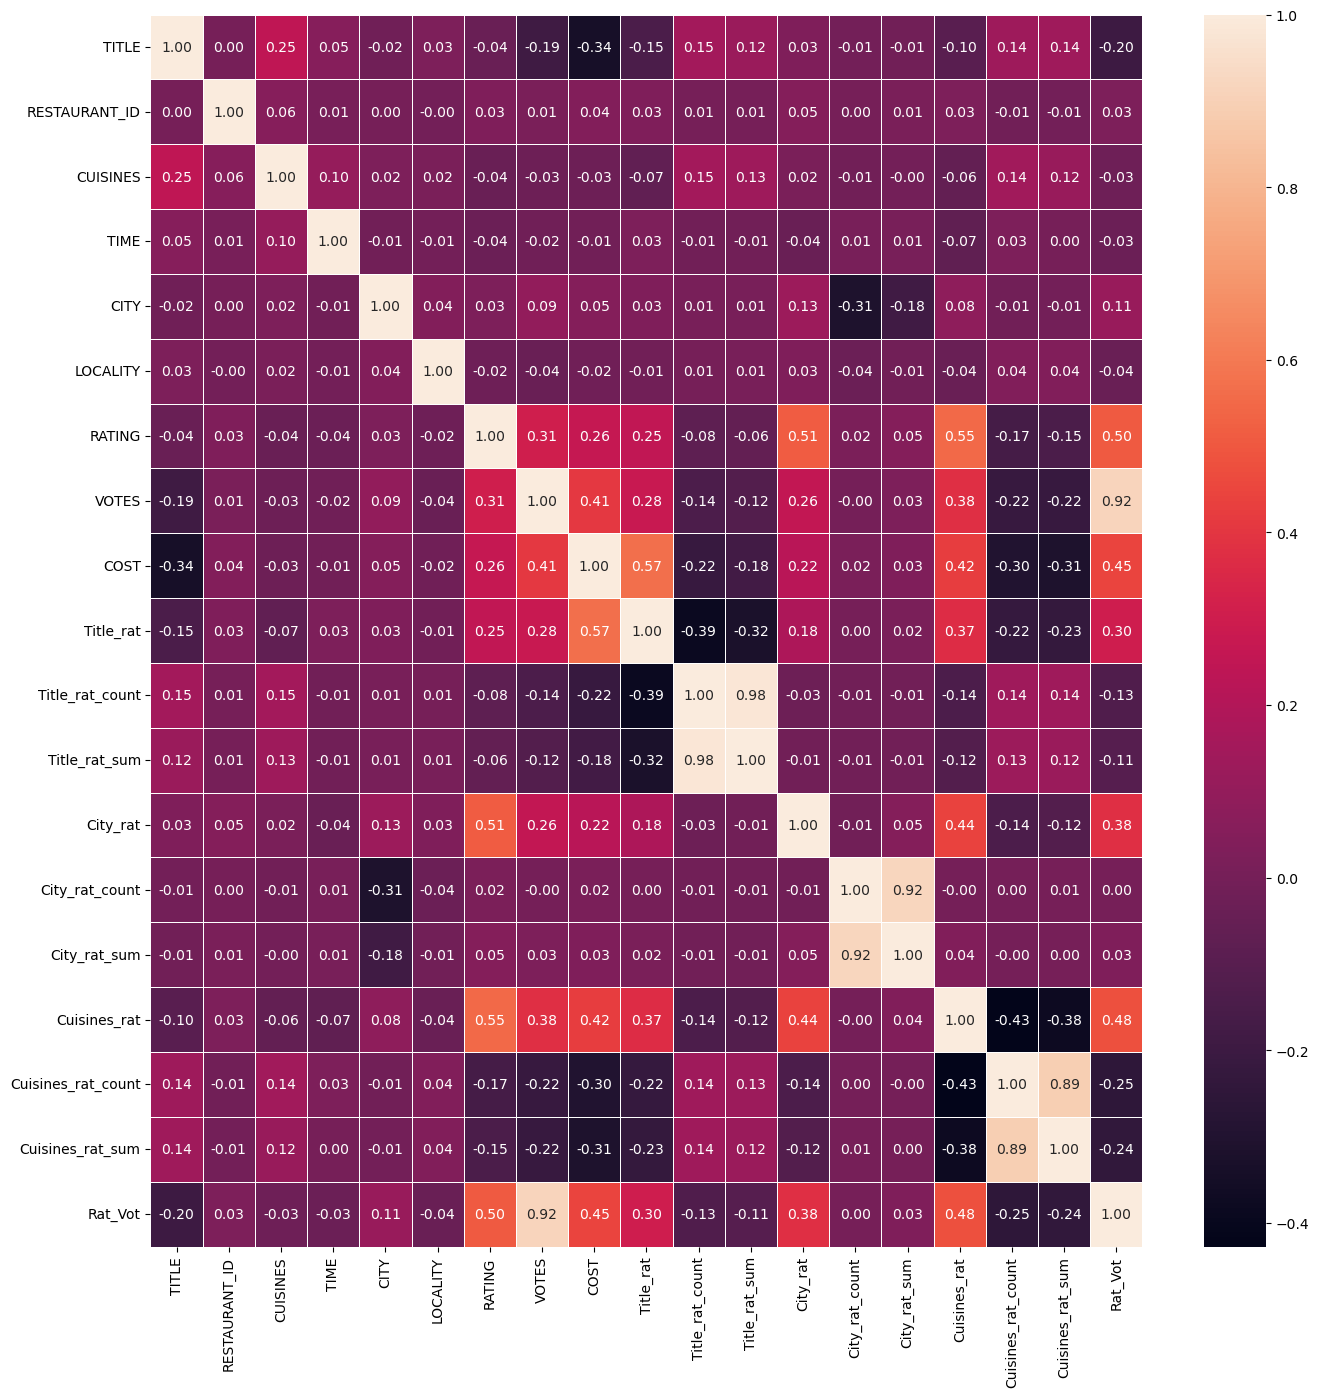

In [41]:
plt.figure(figsize = (16, 16))
sns.heatmap(Train.corr(),
           annot = True,
           fmt = '.2f',
           linewidth = .5)

In [42]:
X = Train.drop('COST', axis = 1)                                             ## data ready for model
y = Train['COST']

sd = StandardScaler()
X_new = sd.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_new,
                                                     y,
                                                     test_size = 0.2)

## Building model

In [45]:
models = [LinearRegression(), SVR(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(model)
    print(r2_score(y_valid, y_pred))
    print('MAE :', mean_absolute_error(y_valid,y_pred ))
    print('MSE :', mean_squared_error(y_valid, y_pred))
    print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred)))
    print('\n')

LinearRegression()
0.4878940965539553
MAE : 6.318404494109862
MSE : 77.66279774640876
RMSE : 8.812649870862268


SVR()
0.5797827827268429
MAE : 5.468231308174595
MSE : 63.72753083890653
RMSE : 7.982952513882726


Ridge()
0.4878925965967319
MAE : 6.318336625761976
MSE : 77.66302522059658
RMSE : 8.812662776970226


Lasso()
0.46025815802479475
MAE : 6.445379684428801
MSE : 81.85389238148264
RMSE : 9.047314097647027


DecisionTreeRegressor()
0.5205214509375646
MAE : 6.052009456264775
MSE : 72.71473601260836
RMSE : 8.527293592495122


RandomForestRegressor()
0.7781409567942501
MAE : 4.310244286840032
MSE : 33.645763278171785
RMSE : 5.800496813047292


AdaBoostRegressor()
0.5571708374290749
MAE : 6.604539758150656
MSE : 67.15671789278791
RMSE : 8.19492024932445


GradientBoostingRegressor()
0.7663591795296087
MAE : 4.446890601311207
MSE : 35.432514375239506
RMSE : 5.952521682046989




####  Random Forest Regressor is performing well 

In [46]:
cv = KFold(n_splits = 5, shuffle = True)
params = {'max_features' : ['auto', 'sqrt', 'log2'],
         'min_samples_split' : np.linspace(0.1, 1.0, 10),
         'n_estimators' : [ 50, 100, 500],
         'max_depth' : [x for x in range(5, 10)]}

In [ ]:
rfr_grid = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42),
                  param_grid = params,
                  cv = cv,
                  scoring = 'r2',
                  verbose = True)
rfr_grid.fit(X_train , y_train)

In [51]:
y_pred_rfr = rfr_grid.predict(X_valid)
print('r2_score :', r2_score(y_valid, y_pred_rfr))
print('MAE :', mean_absolute_error(y_valid,y_pred_rfr ))
print('MSE :', mean_squared_error(y_valid, y_pred_rfr))
print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred_rfr)))

r2_score : 0.630093926156075
MAE : 5.346552901182972
MSE : 56.0976555919271
RMSE : 7.489836820113446


In [53]:
# lets go with the model before hyperparameter tuning
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_r = rfr.predict(X_valid)

print('r2_score :', r2_score(y_valid, y_pred_r))
print('MAE :', mean_absolute_error(y_valid,y_pred_r ))
print('MSE :', mean_squared_error(y_valid, y_pred_r))
print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred_r)))

r2_score : 0.7781404376947425
MAE : 4.3215839243498815
MSE : 33.64584200157605
RMSE : 5.800503598962425


## Testing on test data

In [54]:
test = sd.fit_transform(Test)
predict = rfr.predict(test)
predictions = pd.DataFrame(predict, columns = ['COST'])
predictions.to_csv('Predictions.csv')

## saving model

In [55]:
import joblib
joblib.dump(rfr, 'Predicting_food_cost.pkl')

['Predicting_food_cost.pkl']